In [2]:
import pandas as pd

In [3]:
import json

with open('tree.json') as json_file:
    dict_tree = json.load(json_file)
    
keys = list(dict_tree.keys())

def loose_eval(s, l):
    for i in l:
        if s in i or i in s:
            return True
    return False

In [ ]:
keys

In [30]:
find('dried', keys)

'none'

In [113]:
units = ['assortment',
 'bag',
 'bags',
 'ball',
 'balls',
 'bar',
 'bars',
 'basket',
 'baskets',
 'batch',
 'blades',
 'block',
 'bone',
 'bottle',
 'bottles',
 'bowl',
 'bowls',
 'box',
 'boxes',
 'bulb',
 'bulbs',
 'bunch',
 'bunches',
 'can',
 'canister',
 'cans',
 'carton',
 'cartons',
 'chunk',
 'chunks',
 'clove',
 'cloves',
 'container',
 'containers',
 'cube',
 'cubes',
 'cup',
 'cups',
 'dash',
 'dashes',
 'drop',
 'drops',
 'ear',
 'ears',
 'flatout',
 'fluid ounces',
 'foot',
 'g',
 'gallon',
 'gallons',
 'gram',
 'grams',
 'handful',
 'head',
 'heads',
 'inch',
 'inches',
 'jar',
 'jars',
 'kg',
 'knob',
 'lb',
 'leaf',
 'leaves',
 'length',
 'lengths',
 'liter',
 'liters',
 'loaf',
 'loaves',
 'log',
 'logs',
 'lump',
 'mg',
 'milliliter',
 'minute',
 'ml',
 'neck',
 'ounce',
 'ounces',
 'oval',
 'oz',
 'package',
 'packaged',
 'packages',
 'packet',
 'packets',
 'peel',
 'peels',
 'piece',
 'pieces',
 'pinch',
 'pinches',
 'pint',
 'pints',
 'pitted',
 'pkg',
 'pocket',
 'pod',
 'pods',
 'portions',
 'pot',
 'pouch',
 'pouches',
 'pound',
 'pounds',
 'quart',
 'quarts',
 'rack',
 'racks',
 'ring',
 'rings',
 'roll',
 'rolls',
 'round',
 'scoop',
 'scoops',
 'serving',
 'servings',
 'set',
 'sheet',
 'sheets',
 'shells',
 'shot',
 'shots',
 'skewers',
 'slab',
 'slabs',
 'sleeve',
 'sleeves',
 'slice',
 'slices',
 'spears',
 'splash',
 'splashes',
 'spray',
 'sprays',
 'sprinkle',
 'square',
 'squares',
 'squeeze',
 'squeezes',
 'squirts',
 'stalk',
 'stalks',
 'star',
 'stems',
 'stewing',
 'stick',
 'sticks',
 'store',
 'strands',
 'straw',
 'strip',
 'strips',
 'tablespoon',
 'tablespoons',
 'tablet',
 'tablets',
 'teaspoon',
 'teaspoons',
 'tins',
 'tray',
 'trays',
 'tub',
 'tube',
 'tubes',
 'tubs',
 'twist',
 'twists',
 'wedge',
 'wedges',
 'wheel',
 'wheels',
 'wrap',
 'wraps',
 'tbsp',
 'tsp',
 'l',
 'g',
 'tbsps',
 'tsps',
 'cm',
 'tin', 
 'milliliters',]

In [114]:
def isUnit(s):
    return s in units

In [53]:
from strsimpy import Cosine
from itertools import permutations

cos = Cosine(1)

def findWrapper(s):
    if find(s, [dict_tree], 1, []):
        return True
    return False


def find(s, l):
    if s in l:
        return 'exact'
    elif loose_eval(s, l):
        return 'partial'    
    return 'none'

In [116]:
def word2featuresBase(sent, i):
    word = str(sent[i].token_text)
    postag = sent[i].token_tag
    
    # Feature dict
    features = {
        'word.lower()': word.lower(), # lower case variant of the token
        'word.inDict()' : find(word, keys),
        'word.isdigit()': word.isdigit(),
        'word.isUnit' : isUnit(word),
        'postag': postag,
    }
    if i > 0:
        # Previous word feature
        word1 = str(sent[i-1].token_text) # previous word
        postag1 = sent[i-1].token_tag
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.isdigit()': word.isdigit(),
            '-1:word.inDict()' : find(word1, keys),
            '-1:word.isUnit' : isUnit(word1),
            '-1:postag': postag1,
        })
    else:
        features['BOS'] = True # Beginning of sentence as a feature
    if i > 1:
            # Previous +1 word feature
        word2 = str(sent[i-2].token_text) # previous word
        postag2 = sent[i-2].token_tag
        features.update({
            '-2:word.lower()': word2.lower(),
            '-2:word.isdigit()': word2.isdigit(),
            '-2:word.inDict()' : find(word2, keys),
            '-2:word.isUnit' : isUnit(word2),
            '-2:postag': postag2,
        })
        
    if i < len(sent)-2:
        # Next word feature
        word3 = str(sent[i+2].token_text) # next word
        postag3 = sent[i+2].token_tag
        features.update({
            '+2:word.lower()': word3.lower(),
            '+2:word.isdigit()': word3.isdigit(),
            '+2:word.inDict()' : find(word3, keys),
            '+2:word.isUnit' : isUnit(word3),
            '+2:postag': postag3,
        })
    else:
        features['EOS'] = True # end of sentence as a feature

    if i < len(sent)-1:
        # Next word feature
        word4 = str(sent[i+1].token_text) # next word
        postag4 = sent[i+1].token_tag
        features.update({
            '+1:word.lower()': word4.lower(),
            '+1:word.isdigit()': word4.isdigit(),
            '+1:word.inDict()' : find(word4, keys),
            '+1:word.isUnit' : isUnit(word4),
            '+1:postag': postag4,
        })
    else:
        features['EOS'] = True # end of sentence as a feature

    return features


def sent2featuresBase(sent):
    return [word2featuresBase(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [x.NER_tags for x in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

In [7]:
df_ar_gk_train = pd.read_csv('ar_gk_train_cleaned.csv')

sents_train = []
temp = []
tags_train = []
temp_tags = []
current_id = 0

for item in df_ar_gk_train.itertuples(index=False):
    if item.sent_id != current_id:
        current_id += 1
        sents_train.append(temp)
        tags_train.append(temp_tags)
        temp = []
        temp_tags = []
    temp.append(item)
    temp_tags.append(item.NER_tags)

In [8]:
df_ar_gk_test = pd.read_csv('ar_gk_test_cleaned.csv')

sents_test = []
temp = []
tags_test = []
temp_tags = []
current_id = 0

for item in df_ar_gk_test.itertuples(index=False):
    if item.sent_id != current_id:
        current_id += 1
        sents_test.append(temp)
        tags_test.append(temp_tags)
        temp = []
        temp_tags = []
    temp.append(item)
    temp_tags.append(item.NER_tags)

In [9]:
filtered_train = []
filtered_test = []

start = False

for sent in sents_train:
    temp = []
    for token in sent:
        if token.token_text == '-LRB-':
            start = True
            continue
        elif token.token_text == '-RRB-':
            start = False
            continue
        elif not start:
            temp.append(token)
    filtered_train.append(temp)
            
start = False
            
for sent in sents_test:
    temp = []
    for token in sent:
        if token.token_text == '-LRB-':
            start = True
            continue
        elif token.token_text == '-RRB-':
            start = False
            continue
        elif not start:
            temp.append(token)
    filtered_test.append(temp)

In [117]:
X_train_base = [sent2featuresBase(s) for s in filtered_train]
X_test_base = [sent2featuresBase(s) for s in filtered_test]

y_train = [sent2labels(s) for s in filtered_train]
y_test = [sent2labels(s) for s in filtered_test]

In [11]:
X_train_base[2]

[{'bias': 1.0,
  'word.lower()': '2',
  'word.inDict()': 'none',
  'word.isdigit()': True,
  'postag': 'CD',
  'BOS': True,
  '+2:word.lower()': 'dried',
  '+2:word.isdigit()': False,
  '+2:word.inDict()': 'none',
  '+2:postag': 'VBD',
  '+1:word.lower()': 'tablespoons',
  '+1:word.isdigit()': False,
  '+1:word.inDict()': 'partial',
  '+1:postag': 'NNS'},
 {'bias': 1.0,
  'word.lower()': 'tablespoons',
  'word.inDict()': 'partial',
  'word.isdigit()': False,
  'postag': 'NNS',
  '-1:word.lower()': '2',
  '-1:word.isdigit()': False,
  '-1:word.inDict()': 'partial',
  '-1:postag': 'CD',
  '+2:word.lower()': 'marjoram',
  '+2:word.isdigit()': False,
  '+2:word.inDict()': 'exact',
  '+2:postag': 'NN',
  '+1:word.lower()': 'dried',
  '+1:word.isdigit()': False,
  '+1:word.inDict()': 'none',
  '+1:postag': 'VBD'},
 {'bias': 1.0,
  'word.lower()': 'dried',
  'word.inDict()': 'none',
  'word.isdigit()': False,
  'postag': 'VBD',
  '-1:word.lower()': 'tablespoons',
  '-1:word.isdigit()': False,

In [118]:
import sklearn_crfsuite

from sklearn_crfsuite import CRF

# Base config
crf = CRF(algorithm='lbfgs',
          c1=0.6, #The coefficient for L1 regularization.
          c2=0.04, #The coefficient for L2 regularization.
          max_iterations=100,
          all_possible_transitions=False)

In [119]:
crf.fit(X=X_train_base, y=y_train)

CRF(algorithm='lbfgs', all_possible_transitions=False, c1=0.6, c2=0.04,
    max_iterations=100)

In [61]:
classes = list(set([x for xs in y_train for x in xs]))
classes.remove('O')

In [66]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
import scipy

f1_scorer = make_scorer(metrics.flat_f1_score,
                        average='weighted', labels=classes)

crf = CRF(
    algorithm='lbfgs',
    max_iterations=100,
    all_possible_transitions=True
)
params_space = {
    'c1': scipy.stats.expon(scale=0.5),
    'c2': scipy.stats.expon(scale=0.05),
}

rs = RandomizedSearchCV(crf, params_space,
                        cv=3,
                        verbose=1,
                        n_jobs=-1,
                        n_iter=50,
                        scoring=f1_scorer)
rs.fit(X_train_base, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=CRF(algorithm='lbfgs',
                                 all_possible_transitions=True,
                                 max_iterations=100),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'c1': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002CBB28142B0>,
                                        'c2': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002CBA95E6AC0>},
                   scoring=make_scorer(flat_f1_score, average=weighted, labels=['DF', 'TEMP', 'I-NAME', 'B-STATE', 'SIZE', 'B-QUANTITY', 'B-UNIT', 'I-UNIT', 'I-STATE', 'I-QUANTITY', 'B-NAME']),
                   verbose=1)

In [69]:
rs.best_estimator_

CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.5150852347228059,
    c2=0.04434332568353571, max_iterations=100)

In [120]:
from sklearn_crfsuite.metrics import flat_classification_report
pred = crf.predict(X_train_base)
report = flat_classification_report(y_pred=pred, y_true=y_train)
print(report)

              precision    recall  f1-score   support

      B-NAME       0.97      0.97      0.97      6422
  B-QUANTITY       1.00      1.00      1.00      6269
     B-STATE       0.95      0.97      0.96      2714
      B-UNIT       0.97      0.99      0.98      5066
          DF       0.98      0.99      0.99       596
      I-NAME       0.95      0.97      0.96      4462
  I-QUANTITY       0.96      0.55      0.70        40
     I-STATE       0.92      0.89      0.91       439
      I-UNIT       0.79      0.47      0.59       155
           O       0.97      0.94      0.95      6183
        SIZE       0.99      0.98      0.98       364
        TEMP       0.98      0.95      0.96       128

    accuracy                           0.97     32838
   macro avg       0.95      0.89      0.91     32838
weighted avg       0.97      0.97      0.97     32838



In [121]:
from sklearn_crfsuite.metrics import flat_classification_report
pred = crf.predict(X_test_base)
report = flat_classification_report(y_pred=pred, y_true=y_test)
print(report)

              precision    recall  f1-score   support

      B-NAME       0.92      0.94      0.93      2125
  B-QUANTITY       0.99      0.99      0.99      2083
     B-STATE       0.93      0.95      0.94       898
      B-UNIT       0.95      0.97      0.96      1671
          DF       0.97      0.97      0.97       189
      I-NAME       0.88      0.94      0.91      1484
  I-QUANTITY       0.64      0.47      0.54        15
     I-STATE       0.85      0.86      0.86       142
      I-UNIT       0.37      0.20      0.26        49
           O       0.93      0.86      0.90      2121
        SIZE       0.98      0.97      0.97       100
        TEMP       0.92      0.83      0.88        42

    accuracy                           0.93     10919
   macro avg       0.86      0.83      0.84     10919
weighted avg       0.93      0.93      0.93     10919



In [34]:
import eli5

In [78]:
eli5.show_weights(crf, top=10)

From \ To,DF,O,SIZE,TEMP,B-NAME,I-NAME,B-QUANTITY,I-QUANTITY,B-STATE,I-STATE,B-UNIT,I-UNIT
DF,-1.712,-0.642,0.0,0.0,3.794,1.909,0.0,0.0,0.219,0.0,0.0,0.0
O,-0.59,2.376,-0.13,-0.144,1.008,0.371,0.33,-0.881,0.054,0.878,-0.529,0.0
SIZE,0.0,-0.147,0.0,0.0,3.695,-0.109,0.0,0.0,0.684,0.0,0.89,0.0
TEMP,0.0,-0.025,0.0,2.068,2.667,1.04,0.0,0.0,0.181,0.0,0.0,0.0
B-NAME,0.7,1.135,0.0,0.668,0.0,7.029,0.074,0.0,1.025,0.0,2.624,0.0
I-NAME,0.0,0.58,0.0,0.0,0.0,4.894,0.0,0.0,0.466,0.0,1.378,0.0
B-QUANTITY,-0.148,-0.206,1.274,0.0,3.549,0.0,0.0,1.684,0.966,0.0,2.76,0.0
I-QUANTITY,0.0,-1.148,0.0,0.0,1.854,0.0,0.0,0.0,0.0,0.0,1.888,0.0
B-STATE,0.677,0.521,0.0,0.0,4.208,0.0,0.0,0.0,0.0,5.835,0.293,0.0
I-STATE,0.0,0.047,0.001,0.0,3.966,0.0,0.0,0.0,0.0,3.08,0.0,0.0


In [122]:
from pickle import dump
with open("good.pkl", "wb") as f:
    dump(crf, f, protocol=5)

In [32]:
crf

CRF(algorithm='lbfgs', all_possible_transitions=False, c1=0.6, c2=0.04,
    max_iterations=100)

In [33]:
df_INQ = pd.read_csv('df_INQ_test_cleaned.csv')
df_ingredients = pd.read_csv('df_ingredients_clean.csv')

df_INQ.drop(columns=['Unnamed: 0'], inplace= True)
df_ingredients.drop(columns=['Unnamed: 0'], inplace= True)

df_INQ_agged = df_INQ.groupby('ID', as_index=False).agg(pd.Series.tolist)
df_ingredients_agged = df_ingredients.groupby('ID', as_index=False).agg(pd.Series.tolist)

In [34]:
df_ingredients_with_notes = pd.read_csv('ingredients_PCA_with_notes.csv')
df_ingredients_with_notes.drop(columns=['Unnamed: 0'], inplace= True)

In [35]:
import json

with open('tree.json') as json_file:
    dict_tree = json.load(json_file)

In [127]:
from strsimpy.jaro_winkler import JaroWinkler
from itertools import permutations

jarowinkler = JaroWinkler()

def find_dict(s, trees, order, steps):
    max_order = s.split(' ')
    candidates = []
    
    if order < len(s.split(' ')):
        
        for i in permutations(s.split(' '), order):
            for tree in trees:
                candidate = tree.get(' '.join(i))
                if candidate is not None:
                    steps.append((' '.join(i), order))
                    candidates.append(candidate)
 
        if not candidates:
            
            if any([not(tree.keys()) for tree in trees]):
                
                return steps[-1]
            
            sim_score = float('-inf')
            
            for i in permutations(s.split(' '), order):
                for tree in trees:
                    candidates = tree.keys()
                    for key in candidates:
                        if jarowinkler.similarity(' '.join(i), key) > sim_score:
                            sim_score = jarowinkler.similarity(s, key)
                            best_key = key
                steps.append((best_key, order - 1))
            
            return steps[-1]
            
        find_dict(s, candidates, order+1, steps)
        
    else:
        for tree in trees:
            candidate = tree.get(s)
            if candidate is not None:
                steps.append((s, order))
                
        if not steps:
            
            sim_score = float('-inf')
            
            for tree in trees:
                candidates = tree.keys()
                for key in candidates:
                    if jarowinkler.similarity(s, key) > sim_score:
                        sim_score = jarowinkler.similarity(s, key)
                        best_key = key
                            
            steps.append((best_key, order - 1))
            
            return steps[-1]
            
    return steps[-1]

In [138]:
import spacy
from collections import namedtuple

nlp = spacy.load("en_core_web_sm")

test_doc = nlp('vegetable oil')

Token = namedtuple('Token', 'token_text token_tag')

tokens = [Token(token.text, token.tag_) for token in test_doc]

In [65]:
tokens

[Token(token_text='2', token_tag='CD'),
 Token(token_text='tsp', token_tag='NN'),
 Token(token_text='cumin', token_tag='NN'),
 Token(token_text='seeds', token_tag='NNS')]

In [61]:
def word2featuresBase(sent, i):
    word = str(sent[i].token_text)
    postag = sent[i].token_tag
    
    # Feature dict
    features = {
        'word.lower()': word.lower(), # lower case variant of the token
        'word.inDict()' : find(word, keys),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
    }
    if i > 0:
        # Previous word feature
        word1 = str(sent[i-1].token_text) # previous word
        postag1 = sent[i-1].token_tag
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.isdigit()': word.isdigit(),
            '-1:word.inDict()' : find(word, keys),
            '-1:postag': postag1,
        })
    else:
        features['BOS'] = True # Beginning of sentence as a feature
    if i > 1:
            # Previous +1 word feature
        word2 = str(sent[i-2].token_text) # previous word
        postag2 = sent[i-2].token_tag
        features.update({
            '-2:word.lower()': word2.lower(),
            '-2:word.isdigit()': word2.isdigit(),
            '-2:word.inDict()' : find(word2, keys),
            '-2:postag': postag2,
        })
        
    if i < len(sent)-2:
        # Next word feature
        word3 = str(sent[i+2].token_text) # next word
        postag3 = sent[i+2].token_tag
        features.update({
            '+2:word.lower()': word3.lower(),
            '+2:word.isdigit()': word3.isdigit(),
            '+2:word.inDict()' : find(word3, keys),
            '+2:postag': postag3,
        })
    else:
        features['EOS'] = True # end of sentence as a feature

    if i < len(sent)-1:
        # Next word feature
        word4 = str(sent[i+1].token_text) # next word
        postag4 = sent[i+1].token_tag
        features.update({
            '+1:word.lower()': word4.lower(),
            '+1:word.isdigit()': word4.isdigit(),
            '+1:word.inDict()' : find(word4, keys),
            '+1:postag': postag4,
        })
    else:
        features['EOS'] = True # end of sentence as a feature

    return features


def sent2featuresBase(sent):
    return [word2featuresBase(sent, i) for i in range(len(sent))]

In [96]:
sents = []

for row in df_INQ_agged.itertuples():
    temp = []
    for sent in row.INQs:
        doc = nlp(sent)
        tokens = [Token(token.text, token.tag_) for token in doc]
        temp.append(tokens)
    sents.append()
    break

['4 tbsps gochujang', '6 tbsps ketchup', '6 tbsps maple syrup', '4 tbsps soy sauce', '2 tbsps rice wine vinegar', '1 tsp brown sugar', '2 tsp sesame oil', '50 ml water', '2 cm knob of ginger', '4 cloves of garlic', '800 g skinless boneless chicken thigh fillets', '2 eggs', '120 g corn flour', '40 g plain flour', '1 tsp baking soda', '2 tsps garlic powder', '2 tsps onion salt', '0.5 spring onion', '1 tsp toasted white/black sesame seeds', '4 tbsps mayo', 'salt', 'pepper', '1 l vegetable oil']


In [139]:
transformed = sent2featuresBase(tokens)

In [87]:
print(X_test_base[2][0])
print(tokens[0])

{'word.lower()': '4', 'word.inDict()': 'none', 'word.isdigit()': True, 'postag': 'CD', 'BOS': True, '+2:word.lower()': 'tortillas', '+2:word.isdigit()': False, '+2:word.inDict()': 'exact', '+2:postag': 'NNS', '+1:word.lower()': 'corn', '+1:word.isdigit()': False, '+1:word.inDict()': 'exact', '+1:postag': 'NN'}
Token(token_text='4', token_tag='CD')


In [84]:
crf.predict([X_test_base[2]])

[['B-QUANTITY', 'B-NAME', 'I-NAME']]

In [140]:
crf.predict([transformed])

[['I-NAME', 'I-NAME']]

In [97]:
df_INQ_agged

,ID,INQs
0,1,"[4 tbsps gochujang, 6 tbsps ketchup, 6 tbsps m..."
1,2,"[500 g asparagus, 300 g butter, 4 egg yolks, 4..."
2,3,"[320 g puff pastry , 300 g jersey royal baby n..."
3,4,"[4 rashers smoked streaky bacon, 4 spring onio..."
4,5,"[500 g pork belly slices, 3 tbsp maple syrup, ..."
...,...,...
2294,1992939336,"[1.0 inch bacon, 1.0 can all natural tomato so..."
2295,1994124536,"[452.0 milliliters candy melts, 2.0 teaspoons ..."
2296,1995703213,"[793.787 grams head of broccoli, 6.0 garlic cl..."
2297,1998044400,"[4.0 bay leaves- broken, 850.486 grams chickpe..."


In [143]:
from tqdm import tqdm

stat_result = []
diff = []

for row in tqdm(df_INQ_agged.itertuples()):
    
    additional = []
    perfect_match_from_database = 0
    perfect_match_from_dict = 0
    perfect_match_from_database_not_in_dict = 0
    loose_match_from_database = 0
    loose_match_from_dict = 0
    loose_match_from_database_not_in_dict = 0
    wrong_count = 0
    
    ID = row.ID
    
    ingredients = df_ingredients_with_notes[df_ingredients_with_notes['ID'] == ID]
    
    base_match = ingredients['Ingredients'].to_list()
    
    perfect_match = ingredients[ingredients['note'] == 'Perfect']['match'].to_list()
    
    not_agree_match = ingredients[ingredients['note'] == 'Not perfect']['match'].to_list()
    
    input_texts = row.INQs
    
    for text in input_texts:
        
        ingredients_extracted = []
        
        doc = nlp(text)
        
        tokens = [Token(token.text, token.tag_) for token in doc]
        
        transformed_tokens = sent2featuresBase(tokens)
        
        predict = crf.predict([transformed_tokens])
        temp = []
        
        for idx, i in enumerate(predict[0]):
            if i == 'B-NAME' or i == 'I-NAME':
                temp.append(tokens[idx].token_text)
            else:
                if temp:
                    ingredients_extracted.append(' '.join(temp))
                    temp = []
        ingredients_extracted.append(' '.join(temp))
        
        for final in ingredients_extracted:
            if final in not_agree_match: # perfect match in databse but not in dict
                perfect_match_from_database_not_in_dict += 1
                additional.append(final)
                continue
            
            elif final in perfect_match: # perfect match in database and in dict)
                perfect_match_from_database += 1
                continue
                
            elif find_dict(final, [dict_tree], 1, []): # perfect match in dict but not in database
                
                if find_dict(final, [dict_tree], 1, [])[0] == final:
                    perfect_match_from_dict += 1
                    continue
                elif jarowinkler.similarity(final, find_dict(final, [dict_tree], 1, [])[0]) > 0.85: # if the match is similar enough => loose match
                    
                    if loose_eval(final, not_agree_match): # loose match in database but not in dict
                        loose_match_from_database_not_in_dict += 1
                        continue
                    
                    elif loose_eval(final, perfect_match): # loose match in dict but not in database
                        loose_match_from_database += 1
                        continue
                    
                    else:
                        loose_match_from_dict += 1 # loose match in dict but not in database
                        continue
                    
                else: # match is too far from the dict => check if match is loose in database
                    
                    if loose_eval(final, not_agree_match): # loose match in database but not in dict
                        loose_match_from_database_not_in_dict += 1
                        continue
                    
                    elif loose_eval(final, perfect_match): # loose match in dict but not in database
                        loose_match_from_database += 1
                        continue
                    
                    else:
                        diff.append(f'{ID}; {text}; {final}\n')
                        wrong_count += 1
                        continue
            
            elif loose_eval(final, not_agree_match): # loose match in database but not in dict
                loose_match_from_database_not_in_dict += 1
                continue
            
            elif loose_eval(final, perfect_match): # loose match in dict but not in database
                loose_match_from_database += 1
                continue
            
            elif find_dict(final, [dict_tree], 1, []): # loose close
                
                if jarowinkler.similarity(final, find_dict(final, [dict_tree], 1, [])[0]) > 0.85:
                    loose_match_from_dict += 1
                    continue
                
                else:
                    diff.append(f'{ID}; {text}; {final}\n')
                    wrong_count += 1
                    continue
                
            else:
                diff.append(f'{ID}; {text}; {final}\n')
                wrong_count += 1
                continue
            # extract.append(final)
            
    stat_result.append({
        'additional': additional,
        'perfect_match_from_database' : perfect_match_from_database, # exact to pca (ingredients included in dict)
        'perfect_match_from_dict': perfect_match_from_dict, # exact from dict
        'perfect_match_from_database_not_in_dict': perfect_match_from_database_not_in_dict, # exact to pca and result not in dict
        'loose_match_from_database': loose_match_from_database, # loose match to pca (any ingredients)
        'loose_match_from_dict': loose_match_from_dict,
        'loose_match_from_database_not_in_dict': loose_match_from_database_not_in_dict,
        'wrong_count': wrong_count,
    })
        
file = open('compare_crf.txt', 'w')

file.writelines(diff)

file.close()

0it [00:00, ?it/s]

2299it [07:32,  5.08it/s]


In [144]:
stat_result[0]


{'additional': [],
 'perfect_match_from_database': 16,
 'perfect_match_from_dict': 5,
 'perfect_match_from_database_not_in_dict': 0,
 'loose_match_from_database': 3,
 'loose_match_from_dict': 1,
 'loose_match_from_database_not_in_dict': 0,
 'wrong_count': 0}

In [145]:
analysis = []

for i in stat_result:
    total = sum(list(i.values())[1:])
    strict_count = i['perfect_match_from_database'] + i['perfect_match_from_dict'] + i['perfect_match_from_database_not_in_dict']
    loose_count = total - i['wrong_count']
    strict_acc = strict_count / total
    loose_acc = loose_count / total
    analysis.append((strict_acc, loose_acc))

In [146]:
strict_accs = [x[0] for x in analysis]
loose_accs = [x[1] for x in analysis]

In [147]:
import numpy as np

print('Strict mean: ', np.mean(strict_accs))
print('Strict std: ', np.std(strict_accs))
print('Strict var: ', np.var(strict_accs))
print('Loose mean: ', np.mean(loose_accs))
print('Loose std: ', np.std(loose_accs))
print('Loose var: ', np.var(loose_accs))

Strict mean:  0.8214562482784478
Strict std:  0.1342446829585839
Strict var:  0.018021634902650706
Loose mean:  0.9594515228797424
Loose std:  0.06512598060588372
Loose var:  0.004241393349877942


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

df_res = pd.DataFrame({'Strict accuracy' : strict_accs, 'Loose accuracy' : loose_accs, })

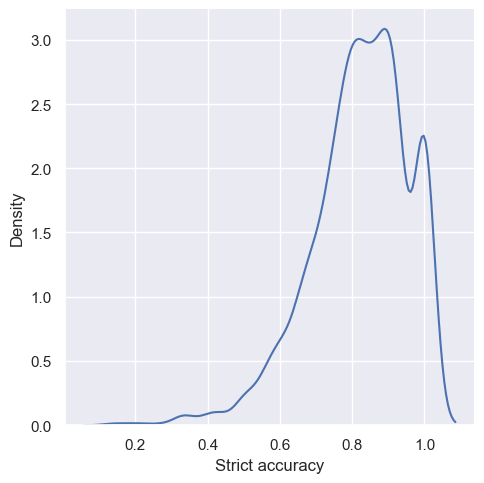

In [152]:
sns.displot(data=df_res, x="Strict accuracy", kind="kde")

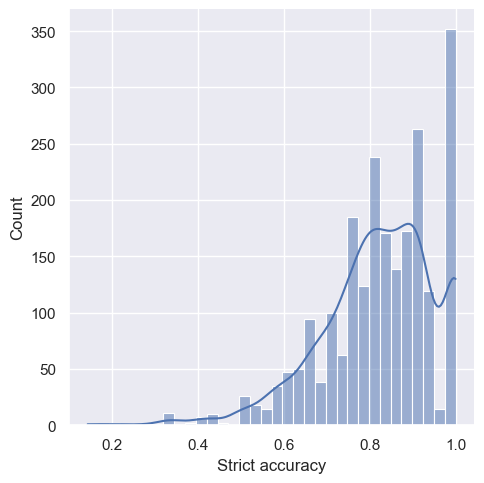

In [151]:
sns.displot(data=df_res, x="Strict accuracy", kde=True)